In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#**Getting** **basic data**

In [2]:
start = datetime(1999, 3, 9)
end = datetime.today()
yahoo = web.DataReader('AMZN','yahoo',start=start,end=end)
yahoo.info
data = yahoo

In [3]:
data.to_csv('DATA.csv')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-03-09,66.62500,61.71875,62.5625,64.96875,16292000.0,64.96875
1999-03-10,69.46875,67.00000,68.3750,68.56250,14117600.0,68.56250
1999-03-11,71.37500,65.50000,69.8750,67.43750,16252200.0,67.43750
1999-03-12,67.68750,64.31250,67.0000,66.65625,9332600.0,66.65625
1999-03-15,69.50000,65.50000,66.5000,69.46875,7020800.0,69.46875


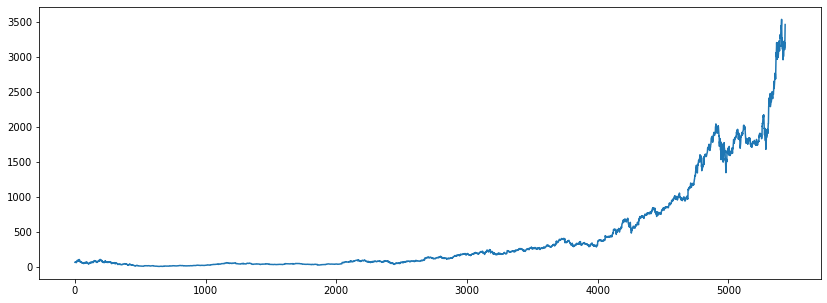

In [4]:
df = data.reset_index()['Close']
plt.figure(figsize = (14,5))
plt.plot(df)
plt.show()

In [5]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5436.000000,5436.000000,5436.000000,5436.000000,5.436000e+03,5436.000000
mean,433.615860,423.429439,428.751127,428.778826,6.838772e+06,428.778826
std,662.128409,646.691521,654.836000,654.822808,5.606313e+06,654.822808
min,6.100000,5.510000,5.910000,5.970000,8.813000e+05,5.970000
25%,43.172501,41.524999,42.330000,42.401250,3.685975e+06,42.401250
50%,120.974998,117.340000,119.075001,119.585003,5.533900e+06,119.585003
75%,431.937508,425.592506,428.000000,427.675003,8.056675e+06,427.675003
max,3552.250000,3486.689941,3547.000000,3531.449951,1.043292e+08,3531.449951


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5436 entries, 1999-03-09 to 2020-10-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5436 non-null   float64
 1   Low        5436 non-null   float64
 2   Open       5436 non-null   float64
 3   Close      5436 non-null   float64
 4   Volume     5436 non-null   float64
 5   Adj Close  5436 non-null   float64
dtypes: float64(6)
memory usage: 297.3 KB


In [7]:
df.describe()

count    5436.000000
mean      428.778826
std       654.822808
min         5.970000
25%        42.401250
50%       119.585003
75%       427.675003
max      3531.449951
Name: Close, dtype: float64

#**Creating more features**

In [8]:
#closing prices to opening prices (changes) net gain in day
features = pd.DataFrame(index=df.index).sort_index()
features['f01'] = data.reset_index()['Close']/data.reset_index()['Open']-1
features.head()

,f01
0,0.038462
1,0.002742
2,-0.034884
3,-0.005131
4,0.044643


In [9]:
#opening prices compared to previous days closing prices (changes)
array = data.reset_index()['Open']/data.reset_index()['Close'].shift(-1)-1
features['f02'] = array
features.tail()

,f01,f02
5431,-0.020550,-0.009604
5432,0.019359,-0.017411
5433,-0.010679,-0.018761
5434,0.023878,-0.071573
5435,0.032096,NaN


In [10]:
#volume logs
array = data.reset_index()['Volume'].apply(np.log)
features['f03'] = array
features.tail()

,f01,f02,f03
5431,-0.020550,-0.009604,15.442179
5432,0.019359,-0.017411,15.276309
5433,-0.010679,-0.018761,14.970535
5434,0.023878,-0.071573,15.403725
5435,0.032096,NaN,15.274506


In [11]:
#volume difference to previous day
array = data.reset_index()['Volume'].diff()
features['f04'] = array
features.head()

,f01,f02,f03,f04
0,0.038462,-0.087511,16.606185,NaN
1,0.002742,0.013902,16.462933,-2174400.0
2,-0.034884,0.048289,16.603739,2134600.0
3,-0.005131,-0.035538,16.049024,-6919600.0
4,0.044643,-0.006072,15.764388,-2311800.0


In [12]:
#log of 5 days moving average of volume
ma_5 = lambda x : x.rolling(5).mean()
array = data.reset_index()['Volume'].rolling(5,min_periods=1).mean().apply(np.log)
features['f05'] = array
features.head()

,f01,f02,f03,f04,f05
0,0.038462,-0.087511,16.606185,NaN,16.606185
1,0.002742,0.013902,16.462933,-2174400.0,16.537122
2,-0.034884,0.048289,16.603739,2134600.0,16.559824
3,-0.005131,-0.035538,16.049024,-6919600.0,16.454468
4,0.044643,-0.006072,15.764388,-2311800.0,16.349449


In [13]:
#z_score for closing prices
array = (df - df.rolling(200,min_periods=1).mean())/df.rolling(200,min_periods=1).std()
features['f06'] = array
features.tail()

,f01,f02,f03,f04,f05,f06
5431,-0.020550,-0.009604,15.442179,1311600.0,15.397807,1.124635
5432,0.019359,-0.017411,15.276309,-777500.0,15.373933,1.290415
5433,-0.010679,-0.018761,14.970535,-1135300.0,15.295241,1.268277
5434,0.023878,-0.071573,15.403725,1720900.0,15.261992,1.432859
5435,0.032096,NaN,15.274506,-593364.0,15.286469,1.730017


In [14]:
#signing
array = features['f01'].apply(np.sign)
features['f07'] = array
features.tail()

,f01,f02,f03,f04,f05,f06,f07
5431,-0.020550,-0.009604,15.442179,1311600.0,15.397807,1.124635,-1.0
5432,0.019359,-0.017411,15.276309,-777500.0,15.373933,1.290415,1.0
5433,-0.010679,-0.018761,14.970535,-1135300.0,15.295241,1.268277,-1.0
5434,0.023878,-0.071573,15.403725,1720900.0,15.261992,1.432859,1.0
5435,0.032096,NaN,15.274506,-593364.0,15.286469,1.730017,1.0


In [15]:
#plus-minus how many days the value has increased or decreased
array = features['f07'].rolling(200,min_periods=1).sum()
features['f08'] = array
features.head()

,f01,f02,f03,f04,f05,f06,f07,f08
0,0.038462,-0.087511,16.606185,NaN,16.606185,NaN,1.0,1.0
1,0.002742,0.013902,16.462933,-2174400.0,16.537122,0.707107,1.0,2.0
2,-0.034884,0.048289,16.603739,2134600.0,16.559824,0.243662,-1.0,1.0
3,-0.005131,-0.035538,16.049024,-6919600.0,16.454468,-0.165545,-1.0,0.0
4,0.044643,-0.006072,15.764388,-2311800.0,16.349449,1.178915,1.0,1.0


#**Creating TA technical indicator features**

In [16]:
pip install --upgrade ta

Requirement already up-to-date: ta in /usr/local/lib/python3.6/dist-packages (0.5.25)


In [17]:
import ta

In [18]:
ta_data = data
ta_data.shape

(5436, 6)

In [19]:
#making sure there are no missing values
ta_data = ta.utils.dropna(ta_data)

In [20]:
ta_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5436 entries, 1999-03-09 to 2020-10-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5436 non-null   float64
 1   Low        5436 non-null   float64
 2   Open       5436 non-null   float64
 3   Close      5436 non-null   float64
 4   Volume     5436 non-null   float64
 5   Adj Close  5436 non-null   float64
dtypes: float64(6)
memory usage: 297.3 KB


In [21]:
ta_data = ta.add_all_ta_features(ta_data,'Open','High','Low','Close','Volume',fillna=True)
ta_data.head()

/usr/local/lib/python3.6/dist-packages/ta/trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-03-09,66.62500,61.71875,62.5625,64.96875,16292000.0,64.96875,5.292306e+06,16292000.0,0.324841,0.000000e+00,50.000000,0.000000,0.000000,-1.379219e+07,1000.000000,64.437500,0.0,64.968750,64.968750,64.968750,0.000000,0.000000,0.0,0.0,64.437500,69.343750,59.531250,15.227934,0.554140,0.0,0.0,7.551708,0.662420,0.000000,0.000000,0.000000,64.968750,64.968750,64.968750,64.968750,0.0,0.0,0.0,0.000000,0.000000,0.000000,-84.410699,1.000000,0.000000,363.810076,-848.479575,-848.479575,0.000000,64.171875,64.171875,64.171875,64.171875,423.165312,413.19282,4.0,4.0,0.0,-1.0,-1.0000,0.0,0.0,100.000000,0.000000,0.000000,66.242038,66.242038,-33.757962,0.0,64.968750,0.0,-84.847957,0.000000,0.000000
1999-03-10,69.46875,67.00000,68.3750,68.56250,14117600.0,68.56250,9.045085e+06,30409600.0,0.297442,5.073512e+07,100.000000,71.041090,71.041090,-1.304251e+07,1055.315055,66.250969,0.0,66.765625,70.359375,63.171875,10.765270,0.750000,0.0,0.0,66.390625,70.078125,62.703125,11.108496,0.794492,0.0,0.0,11.607770,0.883065,0.286681,0.057336,0.229345,66.765625,66.765625,65.521635,65.234954,0.0,0.0,0.0,0.020858,0.001009,0.019849,0.010804,1.918898,66.666667,362.013201,-844.288894,-846.384235,2.095340,65.593750,65.593750,65.593750,65.593750,423.165312,413.19282,8.0,4.0,4.0,-1.0,-1.0000,0.0,0.0,100.000000,100.000000,38.205980,88.306452,77.274245,-11.693548,0.0,66.308845,0.0,5.531506,5.383935,5.531506
1999-03-11,71.37500,65.50000,69.8750,67.43750,16252200.0,67.43750,3.512422e+06,14157400.0,0.075274,4.087529e+07,46.573024,7.342756,39.191923,5.142434e+05,1055.315055,66.896434,0.0,66.989583,69.991464,63.987703,8.962230,0.574606,0.0,0.0,66.961806,71.378472,62.545139,13.191600,0.553852,0.0,0.0,14.414555,0.592233,0.418278,0.129525,0.288753,66.989583,66.989583,65.816383,65.398105,0.0,0.0,0.0,0.032125,0.011509,0.020616,0.024975,2.902402,45.254470,361.789242,-843.766578,-845.511682,1.745105,66.546875,66.546875,66.546875,66.546875,423.165312,413.19282,8.0,4.0,4.0,-1.0,66.6250,0.0,1.0,74.787394,99.306759,36.196319,59.223301,71.257264,-40.776699,0.0,66.747650,0.0,-1.640839,-1.654450,3.799904
1999-03-12,67.68750,64.31250,67.0000,66.65625,9332600.0,66.65625,7.141766e+06,4824800.0,0.127544,3.399438e+07,35.872215,-88.148667,-3.254940,-3.747887e+05,1043.089441,66.783484,0.0,66.906250,69.521933,64.290567,7.818949,0.452211,0.0,0.0,66.776042,70.932292,62.619792,12.448327,0.485589,0.0,0.0,14.432508,0.511327,0.454292,0.194478,0.259814,66.906250,66.906250,65.945593,65.491301,0.0,0.0,0.0,0.037584,0.029953,0.007632,0.038389,3.843755,-25.659472,361.872576,-843.960928,-845.123994,1.163066,66.546875,66.546875,66.546875,66.546875,423.165312,413.19282,8.0,4.0,4.0,65.5,66.6250,1.0,0.0,62.922913,98.259043,42.211055,51.132686,66.220813,-48.867314,0.0,66.714032,0.0,-1.158480,-1.165243,2.597403
1999-03-15,69.50000,65.50000,66.

In [22]:
ta_data.shape

(5436, 78)

In [23]:
#selecting a few features
selected_features = [
                     'volume_adi',
                     'volume_fi',
                     'volatility_bbm',
                     'trend_macd',
                     'trend_vortex_ind_diff',
                     'momentum_rsi',
                     'Close',
                     'trend_cci',
                     'volatility_kcw',
                     'trend_dpo'
                     ]
for i in selected_features:
  array = ta_data.reset_index()[i]
  features[i] = array
features.head()

,f01,f02,f03,f04,f05,f06,f07,f08,volume_adi,volume_fi,volatility_bbm,trend_macd,trend_vortex_ind_diff,momentum_rsi,Close,trend_cci,volatility_kcw,trend_dpo
0,0.038462,-0.087511,16.606185,NaN,16.606185,NaN,1.0,1.0,5.292306e+06,0.000000e+00,64.968750,0.000000,0.000000,100.000000,64.96875,0.000000,15.227934,363.810076
1,0.002742,0.013902,16.462933,-2174400.0,16.537122,0.707107,1.0,2.0,9.045085e+06,5.073512e+07,66.765625,0.286681,0.019849,100.000000,68.56250,66.666667,11.108496,362.013201
2,-0.034884,0.048289,16.603739,2134600.0,16.559824,0.243662,-1.0,1.0,3.512422e+06,4.087529e+07,66.989583,0.418278,0.020616,74.787394,67.43750,45.254470,13.191600,361.789242
3,-0.005131,-0.035538,16.049024,-6919600.0,16.454468,-0.165545,-1.0,0.0,7.141766e+06,3.399438e+07,66.906250,0.454292,0.007632,62.922913,66.65625,-25.659472,12.448327,361.872576
4,0.044643,-0.006072,15.764388,-2311800.0,16.349449,1.178915,1.0,1.0,1.405287e+07,3.195889e+07,67.418750,0.701690,0.015348,77.042704,69.46875,53.373615,12.303868,361.360076


#**Feature Selection**

#normalization


In [24]:
from sklearn.preprocessing import StandardScaler,Normalizer

In [25]:
#normalizing the inputs
std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(features.dropna())
features_scaled.shape

(5434, 18)

In [26]:
df = pd.DataFrame(features_scaled,index=features.dropna().index)
df.columns = features.dropna().columns
df.head()

,f01,f02,f03,f04,f05,f06,f07,f08,volume_adi,volume_fi,volatility_bbm,trend_macd,trend_vortex_ind_diff,momentum_rsi,Close,trend_cci,volatility_kcw,trend_dpo
1,0.067850,0.329203,1.555228,-0.445689,1.773641,0.060342,0.992305,0.00740,-1.321436,1.320861,-0.553740,-0.214005,-0.167716,3.801459,-0.550398,0.414973,0.793893,14.099053
2,-1.269176,1.129332,1.793124,0.438384,1.816029,-0.283171,-1.012225,-0.05113,-1.329153,1.046986,-0.553391,-0.206392,-0.165323,1.739303,-0.552119,0.223728,1.225833,14.090336
3,-0.211908,-0.821167,0.855916,-1.419258,1.619316,-0.586483,-1.012225,-0.10966,-1.324091,0.855856,-0.553521,-0.204308,-0.205822,0.768899,-0.553315,-0.409649,1.071712,14.093579
4,1.556776,-0.135551,0.375014,-0.473880,1.423233,0.410054,0.992305,-0.05113,-1.314450,0.799317,-0.552724,-0.189996,-0.181753,1.923766,-0.549011,0.296245,1.041758,14.073632
5,-1.355753,1.426699,0.494298,0.105805,1.143850,-0.665497,-1.012225,-0.10966,-1.322031,0.595888,-0.552857,-0.191071,-0.169682,0.209674,-0.552932,0.129251,1.004728,14.076957


In [27]:
input_df = df
output_df = df['Close'] 
print(output_df.tail())


5430    4.239628
5431    4.087786
5432    4.234258
5433    4.226394
5434    4.373431
Name: Close, dtype: float64


In [28]:
corr = input_df.corrwith(output_df)
corr

f01                     -0.011968
f02                     -0.011599
f03                     -0.315343
f04                      0.000535
f05                     -0.364107
f06                      0.277143
f07                     -0.000002
f08                     -0.034640
volume_adi               0.672320
volume_fi                0.106073
volatility_bbm           0.998462
trend_macd               0.492926
trend_vortex_ind_diff    0.131190
momentum_rsi             0.166667
Close                    1.000000
trend_cci                0.121213
volatility_kcw          -0.344815
trend_dpo               -0.093091
dtype: float64

In [29]:
selected_columns = corr[corr>0.1].index.to_list()
corr = input_df[selected_columns].corrwith(output_df)
corr

f06                      0.277143
volume_adi               0.672320
volume_fi                0.106073
volatility_bbm           0.998462
trend_macd               0.492926
trend_vortex_ind_diff    0.131190
momentum_rsi             0.166667
Close                    1.000000
trend_cci                0.121213
dtype: float64

In [30]:
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance

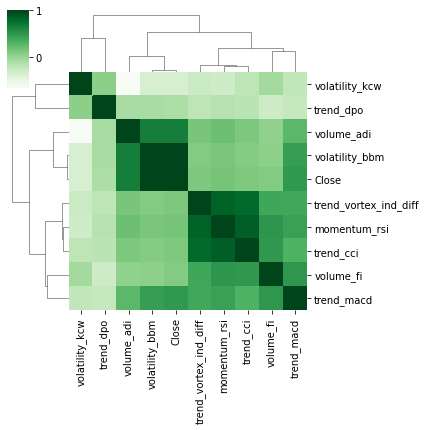

In [31]:
corr_matrix = input_df[selected_features].corr()
correlations_array = np.asarray(corr_matrix)
linkage = hierarchy.linkage(distance.pdist(correlations_array),method='average')
g=sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [32]:
#ignore the close input
label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns
print("Correlation Strength")
print(corr[corr>0.1].sort_values(ascending=False))

Correlation Strength
Close                    1.000000
volatility_bbm           0.998462
volume_adi               0.672320
trend_macd               0.492926
f06                      0.277143
momentum_rsi             0.166667
trend_vortex_ind_diff    0.131190
trend_cci                0.121213
volume_fi                0.106073
dtype: float64
